<h1> Programming Assignment - 5</h1>
<hr>


In [8]:
# Import required packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from datetime import datetime
from scipy.sparse import coo_matrix, csr_matrix
import matplotlib.pyplot as plt

## Question 1
<hr>
Setup a logistic regression model on the data at [adultUCI](http://archive.ics.uci.edu/ml/datasets/Adult).  Discuss the performance of your model using appropriate statistics. Use dummy variables to handle categorical variables. 

1. Prepare the data. Create dummy variables for categorical variables. [See this](https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example)
1. Get feature matrix X, and target variable y (>50k or <50k)
1. Split data into training and testing
1. Normalize data using MinMaxScaler
1. Creat a LogisticRegression object for modeling
1. Train the model with training data
1. Compare the precision, recall, and F1-score on the train and test data.
1. Improve the performance of the model on the test dataset.

In [18]:
# Your code comes here
cols = ["age", "workclass", "fnlwgt", "education", "education-num", 
        "marital-status", "occupation", "relationship", "race", "sex", 
        "capital-gain", "capital-loss", "hours-per-week", "native-country", "y"]
categorical = ["workclass", "education", "marital-status", "occupation", "relationship",
               "race", "sex", "native-country"]
df = pd.read_csv("data/adult.data", header=None, names=cols, sep=", ", engine='python')
# Create dummies
for col in categorical:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1)
    df.drop([col], axis=1, inplace=True)
# Change y to 0,1
df["y"] = df["y"].replace({"<=50K": 0, ">50K": 1})
X = df.drop("y", axis=1)
y = df["y"]
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, random_state=1337)
scaler = MinMaxScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)
model = LogisticRegression(random_state=1337, max_iter=1000).fit(trainX, trainY)
print("Stats for the training set:")
print(f"\tPrecison: {precision_score(trainY, model.predict(trainX))}")
print(f"\tRecall: {recall_score(trainY, model.predict(trainX))}")
print(f"\tF1 Score: {f1_score(trainY, model.predict(trainX))}")
print("Stats for the test set:")
print(f"\tPrecison: {precision_score(testY, model.predict(testX))}")
print(f"\tRecall: {recall_score(testY, model.predict(testX))}")
print(f"\tF1 Score: {f1_score(testY, model.predict(testX))}")

Stats for the training set:
	Precison: 0.7404851114178663
	Recall: 0.6005117543579082
	F1 Score: 0.6631932179441894
Stats for the test set:
	Precison: 0.7386363636363636
	Recall: 0.5730478589420654
	F1 Score: 0.6453900709219859


## Question 2
<hr>
Create the sparse COO representation ( [ref](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html#scipy.sparse.coo_matrix)) of the adjacency matrix (no need to find the dense representation) of the following graph. Find its CSR representation using appropriate Python function. Visualize this matrix by using spy() function. Refer to the notebook of Lecture 10 live session. 

<img src="https://in.mathworks.com/help/examples/matlab/win64/buckydem_02.png" width="60%" />

[Image source: Mathworks](https://in.mathworks.com/help/examples/matlab/win64/buckydem_02.png)

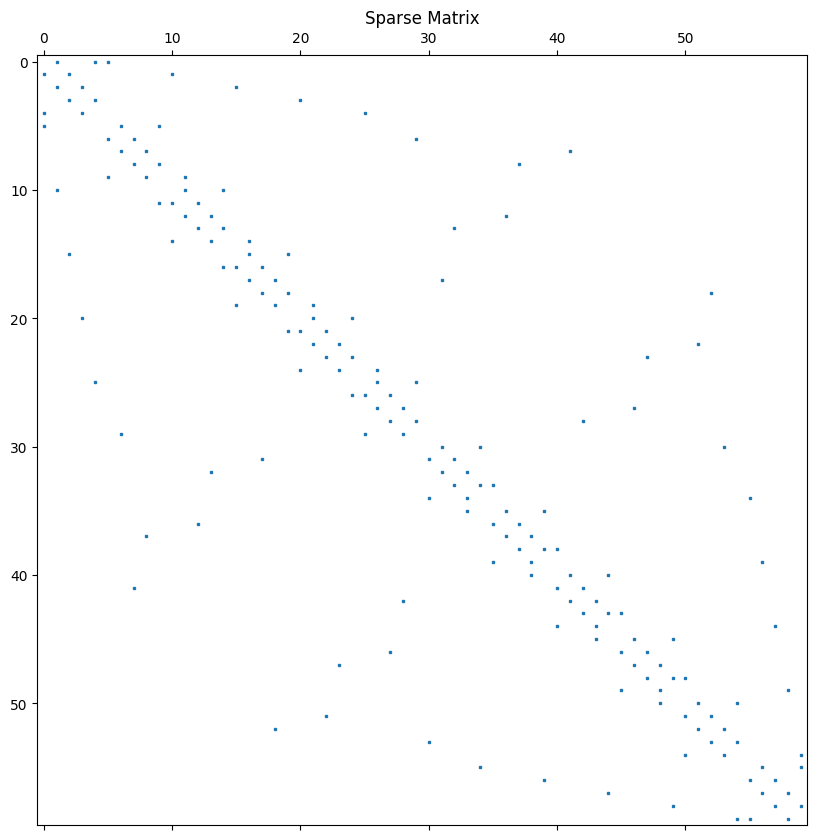

In [10]:
# Your code comes here
row = np.array([i // 3 for i in range(180)]) # fill up the entries by hand or by some other clever means

col = np.array([2, 5, 6, 1, 3, 11, 2, 4, 16, 3, 5, 21, 1, 4, 26, 1, 7, 10, 6, 8, 30, 7, 9, 42, 8, 10, 38, 6, 9, 12, \
                2, 12, 15, 10, 11, 13, 12, 14, 37, 13, 15, 33, 11, 14, 17, 3, 17, 20, 15, 16, 18, 17, 19, 32, 18, 20, 53, 16, 19, 22, \
                4, 22, 25, 20, 21, 23, 22, 24, 52, 23, 25, 48, 21, 24, 27, 5, 27, 30, 25, 26, 28, 27, 29, 47, 28, 30, 43, 7, 26, 29, \
                32, 35, 54, 18, 31, 33, 14, 32, 34, 33, 35, 36, 31, 34, 56, 34, 37, 40, 13, 36, 38, 9, 37, 39, 38, 40, 41, 36, 39, 57, \
                39, 42, 45, 8, 41, 43, 29, 42, 44, 43, 45, 46, 41, 44, 58, 44, 47, 50, 28, 46, 48, 24, 47, 49, 48, 50, 51, 46, 49, 59, \
                49, 52, 55, 23, 51, 53, 19, 52, 54, 31, 53, 55, 51, 54, 60, 35, 57, 60, 40, 56, 58, 45, 57, 59, 50, 58, 60, 55, 56, 59]) - 1

data = np.array([1]*180)

coo = coo_matrix((data, (row, col)), shape=(60,60))

csr = coo.tocsr()
plt.figure(figsize=(20,10))
#plt.axis("off")
plt.spy(csr, marker='s', markersize=2)
plt.title("Sparse Matrix");

## Question 3
<hr>
The adjacency matrix of toy world-wide-web has been provided as a text file on the assignment page. Implement the page-ranking algorithm that displays the index of the 10 highest ranking web-pages. Also report on the time it takes to perform these calculations.

In [94]:
www = np.array(pd.read_csv("data/toy_www_1000.csv", header=None)).astype(dtype=np.float64)
start = datetime.now()
counts = np.sum(www, axis=0)
counts[counts == 0] = 1
Q = www / (counts)
# Replace zero
P = Q.copy()
P[:, np.sum(Q, axis=0) == 0] = 1 / www.shape[0]
alpha = 0.85
e = np.array([[1] * www.shape[0]]).T
A = alpha * P + (1 - alpha) * 1 / www.shape[0] * (e @ e.T)
r = 1/www.shape[0] * e
old_r = 0 * e
while(np.linalg.norm(r - old_r) > 0.00000001):
    old_r = r
    # PageRank pdf says normalization not required for pagerank
    r = A @ r
pagerank = np.argsort(r.T)[:,:-10:-1]
end = datetime.now()
print(pagerank)
print(f"Time taken: {end - start}")

[[704 158 288 758 460 647 643 604 153]]
Time taken: 0:00:00.021634
